In [1]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure,show
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,InputLayer
from keras import Sequential
from keras.optimizers import Adam
import re
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras_tuner.tuners import Hyperband

In [4]:
data_attack_free,data_spoofing_attack,data_fuzzy_attack,data_DoS_attack=[],[],[],[]
with open("D:\IIT-Delhi\Semester-2\SIL765-Networks & System Security\Project\Implementation\DataSets\Attack_free_dataset.txt") as f_a:
    data_attack_free.extend([re.sub(r"Timestamp:\s+(\d+\.\d+)\s+ID:\s+([\da-f]{4})\s+\d+\s+DLC:\s+\d+(\s+[\da-f]{2})*", r"\1@\2", lines).strip("\n").split("@") for lines in f_a.readlines()])

with open("D:\IIT-Delhi\Semester-2\SIL765-Networks & System Security\Project\Implementation\DataSets\Impersonation_attack_dataset.txt") as f_b:
    data_spoofing_attack.extend([re.sub(r"Timestamp:\s+(\d+\.\d+)\s+ID:\s+([\da-f]{4})\s+\d+\s+DLC:\s+\d+(\s+[\da-f]{2})*", r"\1@\2", lines).strip("\n").split("@") for lines in f_b.readlines()])

with open("D:\IIT-Delhi\Semester-2\SIL765-Networks & System Security\Project\Implementation\DataSets\Fuzzy_attack_dataset.txt") as f_c:
    data_fuzzy_attack.extend([re.sub(r"Timestamp:\s+(\d+\.\d+)\s+ID:\s+([\da-f]{4})\s+\d+\s+DLC:\s+\d+(\s+[\da-f]{2})*", r"\1@\2", lines).strip("\n").split("@") for lines in f_c.readlines()])

with open("D:\IIT-Delhi\Semester-2\SIL765-Networks & System Security\Project\Implementation\DataSets\DoS_attack_dataset.txt") as f_d:
    data_DoS_attack.extend([re.sub(r"Timestamp:\s+(\d+\.\d+)\s+ID:\s+([\da-f]{4})\s+\d+\s+DLC:\s+\d+(\s+[\da-f]{2})*", r"\1@\2", lines).strip("\n").split("@") for lines in f_d.readlines()])

In [5]:
a_id_attack_free,a_id_spoofing_attack,a_id_fuzzy_attack,a_id_DoS_attack=[],[],[],[]
for i in range(len(data_attack_free)):
    a_id_attack_free.append(str(data_attack_free[i][1]))
for i in range(len(data_spoofing_attack)):
    a_id_spoofing_attack.append(str(data_spoofing_attack[i][1]))
for i in range(len(data_fuzzy_attack)):
    a_id_fuzzy_attack.append(str(data_fuzzy_attack[i][1]))
for i in range(len(data_DoS_attack)):
    a_id_DoS_attack.append(str(data_DoS_attack[i][1]))
a1,a2,a3,a4=[],[],[],[]
for hex_num in a_id_attack_free:
    dec_value = int(hex_num, 16)
    a1.append(dec_value)
for hex_num in a_id_spoofing_attack:
    dec_value = int(hex_num, 16)
    a2.append(dec_value)
for hex_num in a_id_fuzzy_attack:
    dec_value = int(hex_num, 16)
    a3.append(dec_value)
for hex_num in a_id_DoS_attack:
    dec_value = int(hex_num, 16)
    a4.append(dec_value)

In [6]:
range1=int(np.floor(len(a1)/(128*128)))
range2=int(np.floor(len(a2)/(128*128)))
range3=int(np.floor(len(a3)/(128*128)))
range4=int(np.floor(len(a4)/(128*128)))

In [7]:
storage=np.array([])
rp = RecurrencePlot(dimension=1,threshold='point',percentage=40)
temp1=[]
count=0
for i in range(range1):
    temp=np.array(a1[(i*(128**2)):((i+1)*(128**2))])
    temp=temp.reshape(128,128)
    plot = rp.fit_transform(temp)
    plot=np.array(plot[0])
    plot=plot.astype(int)
    storage=np.append(values=plot,arr=storage)
    storage=storage.reshape(count+1,128,128,1)
    count=count+1
for i in range(range2):
    temp=np.array(a2[(i*(128**2)):((i+1)*(128**2))])
    temp=temp.reshape(128,128)
    plot = rp.fit_transform(temp)
    plot=np.array(plot[0])
    plot=plot.astype(int)
    storage=np.append(values=plot,arr=storage)
    storage=storage.reshape(count+1,128,128,1)
    count=count+1
for i in range(range3):
    temp=np.array(a3[(i*(128**2)):((i+1)*(128**2))])
    temp=temp.reshape(128,128)
    plot = rp.fit_transform(temp)
    plot=np.array(plot[0])
    plot=plot.astype(int)
    storage=np.append(values=plot,arr=storage)
    storage=storage.reshape(count+1,128,128,1)
    count=count+1
for i in range(range4):
    temp=np.array(a4[(i*(128**2)):((i+1)*(128**2))])
    temp=temp.reshape(128,128)
    plot = rp.fit_transform(temp)
    plot=np.array(plot[0])
    plot=plot.astype(int)
    storage=np.append(values=plot,arr=storage)
    storage=storage.reshape(count+1,128,128,1)
    count=count+1


In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(128, input_shape=(128,128), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu",input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(units=16,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])

In [9]:
storage.shape
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 128, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 181,057
Trainable params: 181,057
Non-trainable params: 0
_________________________________________________________________


In [10]:
X=storage
y=np.array([])
y=np.append(values=[0]*range1,arr=y)
y=np.append(values=[1]*(range2+range3+range4),arr=y)
y=y.astype(int)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [ ]:
X_train.shape

(201, 128, 128, 1)

In [11]:
history = model.fit(X_train, y_train, epochs=80, validation_data=(X_val, y_val))
loss, accuracy = model.evaluate(X_test, y_test)
# y_pred = model.predict(X_new)


Epoch 1/80
7/7 [==============================] - 7s 306ms/step - loss: 0.7187 - accuracy: 0.5025 - val_loss: 0.8148 - val_accuracy: 0.2174
Epoch 2/80
7/7 [==============================] - 1s 209ms/step - loss: 0.7009 - accuracy: 0.4876 - val_loss: 0.6355 - val_accuracy: 0.7826
Epoch 3/80
7/7 [==============================] - 1s 158ms/step - loss: 0.6702 - accuracy: 0.5920 - val_loss: 0.7435 - val_accuracy: 0.3478
Epoch 4/80
7/7 [==============================] - 2s 236ms/step - loss: 0.6408 - accuracy: 0.6816 - val_loss: 0.6382 - val_accuracy: 0.6957
Epoch 5/80
7/7 [==============================] - 1s 194ms/step - loss: 0.5909 - accuracy: 0.7363 - val_loss: 0.5644 - val_accuracy: 0.7826
Epoch 6/80
7/7 [==============================] - 2s 258ms/step - loss: 0.4826 - accuracy: 0.8557 - val_loss: 0.4334 - val_accuracy: 0.8261
Epoch 7/80
7/7 [==============================] - 2s 252ms/step - loss: 0.3810 - accuracy: 0.8358 - val_loss: 0.3855 - val_accuracy: 0.8696
Epoch 8/80
7/7 [====

In [ ]:
print(loss,accuracy)

0.2552952468395233 0.875


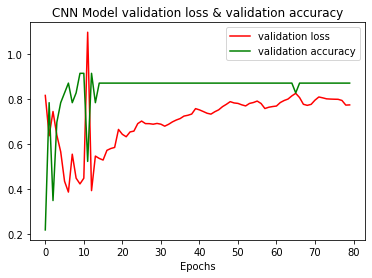

In [12]:

plt.plot(history.history['val_loss'],color='red',label='validation loss')
plt.plot(history.history['val_accuracy'],color='green',label='validation accuracy')
# plt.plot(history.history['val_accuracy'])
plt.title('CNN Model validation loss & validation accuracy')
# plt.ylabel('')
plt.xlabel('Epochs')
plt.legend()
# plt.Color()
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

2/2 [==============================] - 1s 60ms/step
              precision    recall  f1-score   support

      Normal       0.95      0.74      0.83        27
      Attack       0.80      0.97      0.88        29

    accuracy                           0.86        56
   macro avg       0.88      0.85      0.85        56
weighted avg       0.87      0.86      0.85        56

[0.         0.25925926 1.        ] [0.         0.96551724 1.        ]


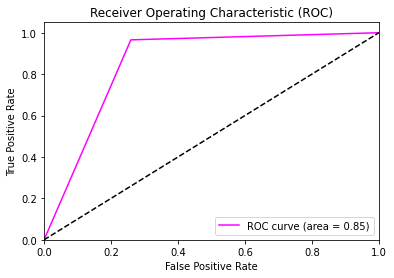

In [13]:
from sklearn.metrics import classification_report,roc_auc_score,auc,roc_curve
y_score=model.predict(X_test)
y_pred=np.round(y_score)
target_names = ["Normal","Attack"]
print(classification_report(y_test, y_pred,target_names=target_names))
roc_score=roc_auc_score(y_test,y_score)
# print(roc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr,tpr)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc,color='magenta')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()